## Online Retail Data - Project 2018
### 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

# Online Retail Data Set 

Dataset from UCI - Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Online+Retail

This Dataset was selected as it fit the criteria of the project: 
- It had more than 4 variables. 
- It has over 100 datapoints (The initial dataset before cleaning had 65,535 rows.)
- There was a date column 

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Transactions occured in 22 countries.

This dataset was analysed using:
- Pandas https://pandas.pydata.org/
- NumPy http://www.numpy.org/
- Seaborn for data visualisations https://seaborn.pydata.org/




In [131]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# read excel, using xls as it reads in faster
df = pd.read_excel("Online-Retail.xls")
# investigate the shape
df.shape

(65535, 8)

In [133]:
# a look at the first 10 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Let's look at the summary statistics

Looking at the summary statistics we can quickly see some issues. 
- Quantity has negative values
- Unit price has values of zero. 

In [134]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


### Cleaning the data

- Check for missing values and removing those rows.
- Check for negative values
- Check for duplicates
- Check for Unit Price equals to 0
- There is a Quantity value of -74215 and 74215. As the negative value will be removed while cleaning the data. As the positive value should also be removed as they cancel each other out and will cause an extreme outlier in dataset otherwise.

#### Finding missing Values and removing them
Using isnull() we can quickly see where the null values are

In [135]:
# check for null values
# There are null values in Customer ID and Description
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25317
Country            0
dtype: int64

Removing rows with missing values/null values, any negative quanitities, unit price less than than 1, Quantity greater than 74214.

In [136]:
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.UnitPrice > 0) & (df.Quantity < 74214)]
# drop rows with missing value
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Removing Duplicates

In [137]:
# This will remove duplicates
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


After cleaning the data, the row count has dropped to 39,183.
We can see from the descriptive statistics that there are no quantities less than 1 or Unit Price equal to 0.

In [138]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,39183.000000,39183.000000,39183.000000
mean,12.722558,3.127540,15393.857311
std,49.120346,5.252035,1769.030365
min,1.000000,0.070000,12347.000000
25%,2.000000,1.250000,14030.500000
50%,5.000000,1.950000,15373.000000
75%,12.000000,3.750000,17059.000000
max,3114.000000,295.000000,18283.000000


### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Questions:

1. Which country has the most market share? no.of customers, most quantity sold, largest total cost - done
2. Customer with the most purchases
3. Customer who spent the most and their location
4. When were the most items sold? 


### Exploratory Data Analysis

In [139]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### How many countries?

This variable is Nominal variable as there is more than two variables. There are 22 countries in total.

In [140]:
#number of countries in the dataset
myArray = np.unique(df['Country'])
len(myArray)

22

In [141]:
# Show me the unique country varibales
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.unique.html
np.unique(df['Country'])

array(['Australia', 'Austria', 'Belgium', 'Channel Islands', 'Cyprus',
       'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

A Large proportion of the customers are form the UK.

In [142]:
mostpopular=df[['Country','CustomerID']]
mostpopular.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
21,United Kingdom,35084
8,France,957
9,Germany,909
6,EIRE,418
18,Spain,353
17,Portugal,204
14,Netherlands,186
20,Switzerland,175
15,Norway,147
0,Australia,139


In [143]:
mostpopular=df[['Country','Quantity']]
mostpopular.groupby(['Country'])['Quantity'].aggregate('count').reset_index().sort_values('Quantity', ascending=False)

,Country,Quantity
21,United Kingdom,35084
8,France,957
9,Germany,909
6,EIRE,418
18,Spain,353
17,Portugal,204
14,Netherlands,186
20,Switzerland,175
15,Norway,147
0,Australia,139


In [144]:
mostpopular=df[['CustomerID','Quantity']].drop_duplicates()
mostpopular.groupby(['CustomerID'])['Quantity'].aggregate('count').reset_index().sort_values('Quantity', ascending=False)

,CustomerID,Quantity
503,15061.0,37
421,14646.0,29
936,17340.0,28
581,15498.0,26
89,12748.0,25
548,15311.0,25
424,14667.0,23
971,17511.0,23
476,14911.0,23
254,13694.0,23


### A look at the InvoiceDate column

This variable is a timeseries and the data is taken over a period of two months, December 2010 to January 2011

In [ ]:
# add a new column for date 
# convert date column to date time + add new column
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# create a new column for month
df['Month'] = df['Date'].dt.strftime('%b %Y')

# create a new column for month
df['Day'] = df['Date'].dt.strftime('%D')
df['Day'] = pd.to_datetime(df['Day'])

#investigating the time series of the data
df['Month'].unique()

### What country had the biggest sales?

In [ ]:
# What is the Total Cost 
df['Total Cost'] =  df['UnitPrice'] * df['Quantity']
df.head(5)

The United Kingdom had the highest sales from the of 22 countries.

In [121]:
totalcost = df.groupby('Country', as_index=False).agg({"Total Cost": "sum"}).sort_values(
    'Total Cost', ascending=False)
totalcost.head(10)

,Country,Total Cost
21,United Kingdom,745045.86
6,EIRE,29069.02
14,Netherlands,27200.86
9,Germany,23094.40
8,France,21943.93
18,Spain,10056.52
0,Australia,9665.88
12,Japan,7705.07
17,Portugal,5811.75
20,Switzerland,4909.55


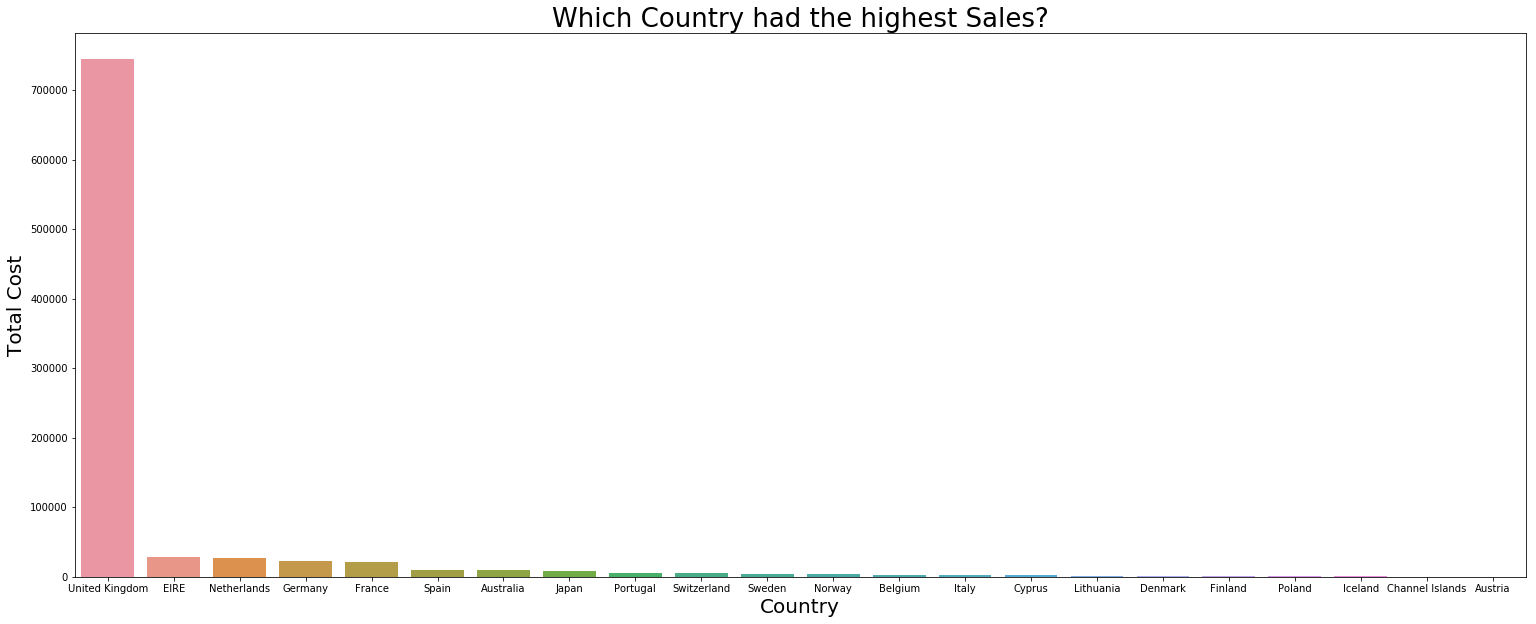

In [122]:
%matplotlib inline
plt.figure(figsize=(26, 10))
plot =sns.barplot(x='Country',y='Total Cost', data=totalcost)

plot.set_title('Which Country had the highest Sales?',fontsize=26)
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Total Cost',fontsize=20)
plot

In [124]:
detailed = df.groupby('Country', as_index=False).agg(
    {"Total Cost": "sum", "Quantity":"sum", "CustomerID":"count"}).sort_values(
    'Quantity', ascending=False)
detailed.head(10)

,Country,Total Cost,Quantity,CustomerID
21,United Kingdom,745045.86,405090,35084
14,Netherlands,27200.86,21381,186
6,EIRE,29069.02,13145,418
8,France,21943.93,11580,957
9,Germany,23094.40,11435,909
0,Australia,9665.88,6001,139
19,Sweden,4381.86,4247,39
12,Japan,7705.07,4093,65
18,Spain,10056.52,3965,353
15,Norway,3787.12,3582,147


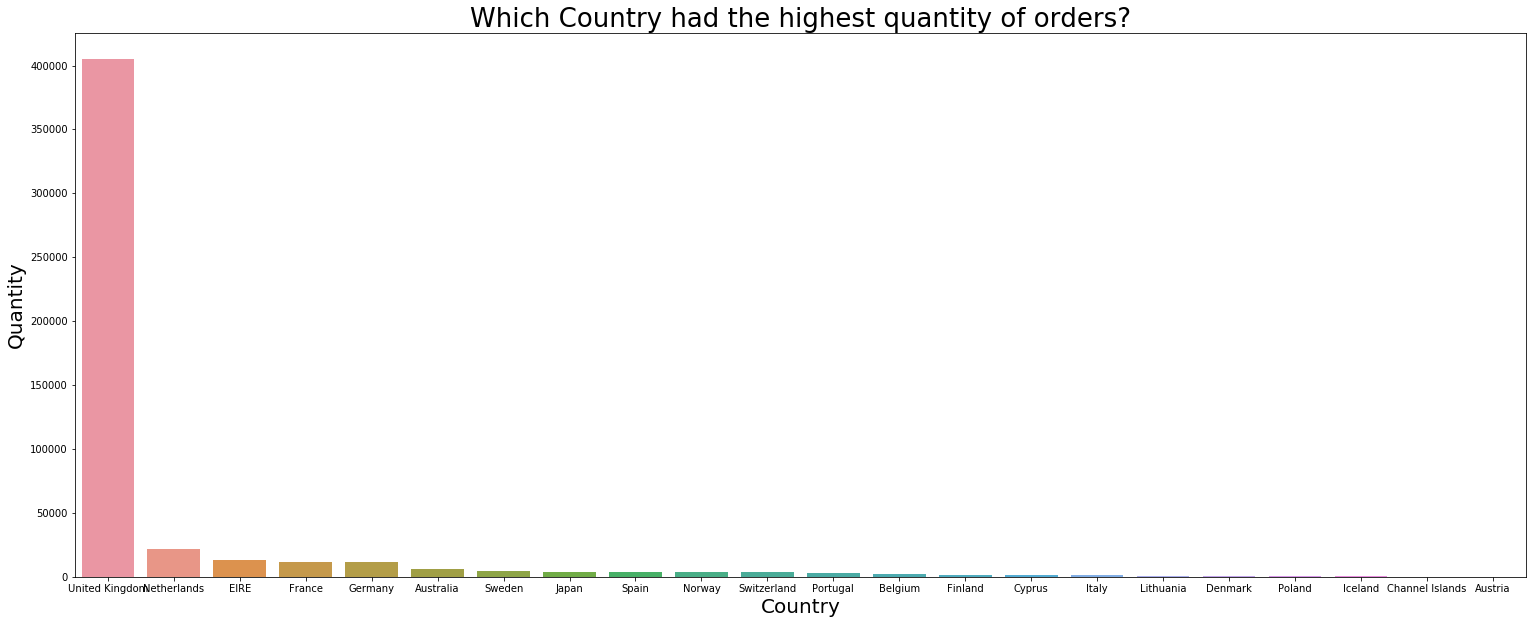

In [125]:
%matplotlib inline
plt.figure(figsize=(26, 10))
plot = sns.barplot(x='Country',y='Quantity', data=detailed)


plot.set_title('Which Country had the highest quantity of orders?',fontsize=26)
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('Quantity',fontsize=20)
plot

### Which Customer had the biggest spend? 

Calculate the spend of each customer, the quantity and the frequency. Using pandas rename function to create new columns.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html


In [127]:
bestcustomer = df.groupby('CustomerID', as_index=False).agg(
    {"Total Cost": "sum", "Quantity":"sum", "InvoiceNo":"count"}).sort_values('Total Cost', ascending=False)
bestcustomer.rename(columns={'CustomerID':'CustomerID', "Total Cost": "Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestcustomer.head(10)

,CustomerID,Spend,Quantity,Frequency
1109,18102.0,27834.61,6695,18
421,14646.0,27008.26,21284,184
637,15749.0,22998.40,9014,5
503,15061.0,22107.61,10801,162
963,17450.0,20649.04,6840,74
329,14156.0,17096.92,7746,44
693,16029.0,14820.15,8689,40
476,14911.0,11218.36,5025,335
971,17511.0,10573.22,8340,122
152,13089.0,9650.39,5345,257


### What day/month had the biggest sales?

In [128]:
bestday = df.groupby('Day', as_index=False).agg(
    { "Total Cost": "sum", "Quantity":"sum", "InvoiceNo":"count"}).sort_values('Day', ascending=True)
bestday.rename(columns={'Day':'Date', "Total Cost": "Total Spend", 'Quantity':'Quantity', "InvoiceNo":"Frequency"}, inplace=True)
bestday.head(10)

,Date,Total Spend,Quantity,Frequency
0,2010-12-01,46376.49,24215,1942
1,2010-12-02,47316.53,31142,2000
2,2010-12-03,23921.71,11839,1103
3,2010-12-05,31771.60,16449,2707
4,2010-12-06,31215.64,16291,1945
5,2010-12-07,53795.31,19444,1110
6,2010-12-08,39248.82,21573,1948
7,2010-12-09,38231.90,17415,1749
8,2010-12-10,33650.28,16051,1380
9,2010-12-12,17305.77,10599,1436


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

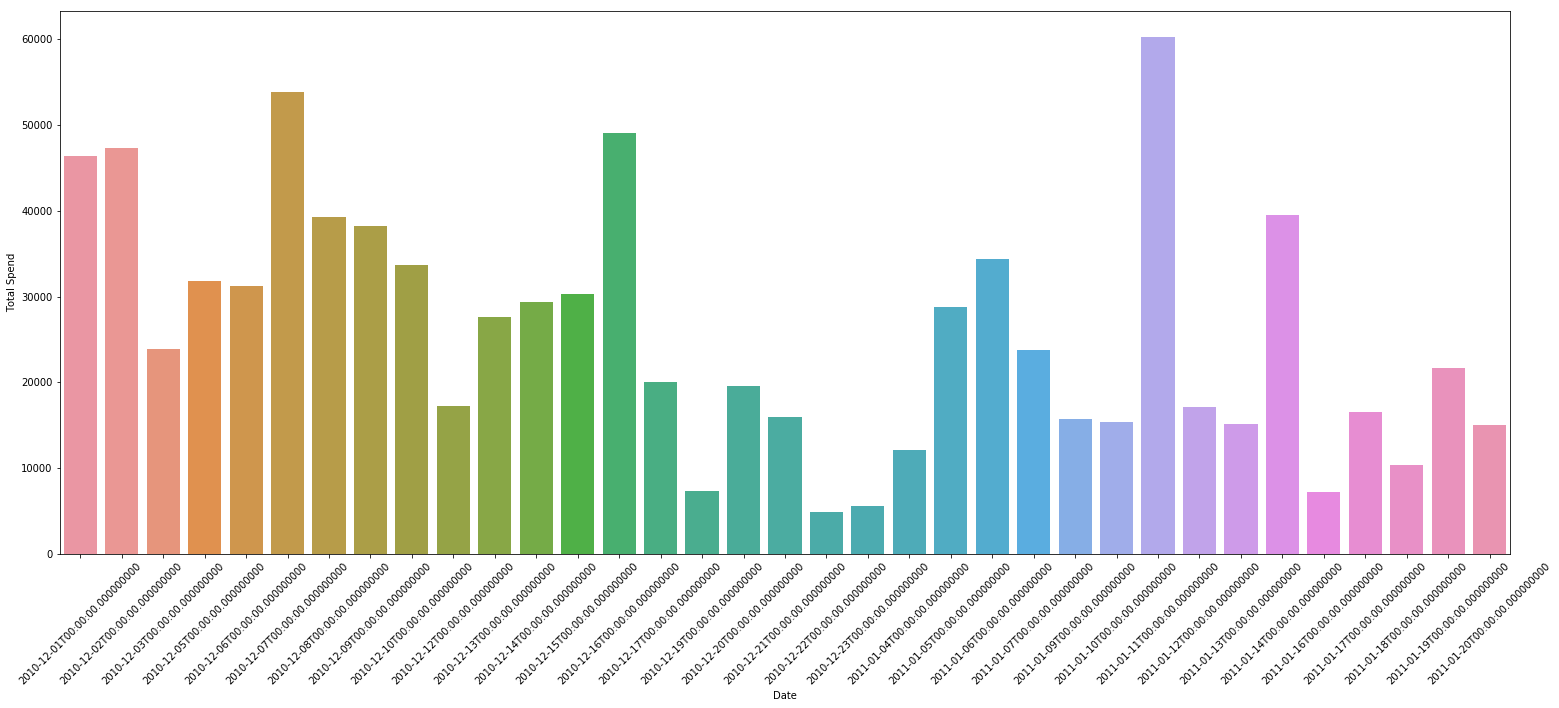

In [130]:
%matplotlib inline
plt.figure(figsize=(26, 10))

plot = sns.barplot(x='Date',y='Total Spend', data=bestday)
plt.xticks(rotation=45)

References:
    
    
https://realpython.com/python-data-cleaning-numpy-pandas/

https://www.oreilly.com/learning/handling-missing-data

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://bigdata-madesimple.com/step-by-step-approach-to-perform-data-analysis-using-python/

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/



